## Import tensorflow, keras modules

In [1]:
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds  # For loading datasets
import numpy as np
import matplotlib.pyplot as plt     # For plotting images
import cv2                          # For resizing images
from keras import Model

print(tf.version.VERSION)
print(tf.keras.__version__)

c:\Users\jinha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.11.0
2.11.0


In [2]:
#testing the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

## Import  MNIST Dataset

In [3]:
mnist = tf.keras.datasets.mnist
# More dataset choices here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets
# input image dimensions
img_x, img_y, img_z = 28, 28, 1

In [4]:
# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_images  = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, img_z)

# Normalize input between 0 and 1
# Very important
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Check shapes of train_images, train_labels etc
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


### Visualize the dataset

In [6]:
# For printing, we name each of the 10 classes below
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

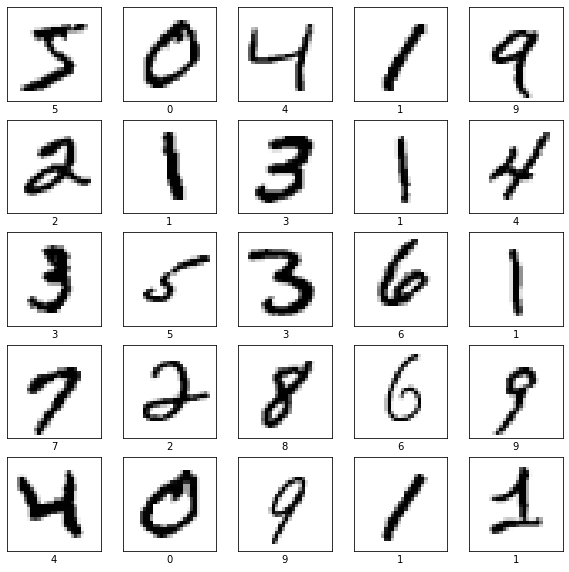

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(img_x, img_y), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])

## (a) Create and train Lenet-5 Using Keras API on MNIST dataset **[3 points]**

In [8]:
'''
Create a NN with 1 input layer
1 conv2D layer, 6 filters, 5x5 filter size, stride = (1, 1), activation tanh, use padding='same' argument (check it on https://keras.io/api/layers/convolution_layers/convolution2d/ )
1 AveragePooling2D layer (use default arguments in https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D )
1 conv2D layer, 16 Filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
1 AveragePooling2D layer (Default arguements)
1 conv2D layer, 120 filters, 5x5 filter size, stride = (1, 1), activation tanh, padding='valid'
Flatten layer
1 Dense layer, 84 units, tanh activation
1 output layer
'''
input_shape = train_images[0].shape
model = tf.keras.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='same', input_shape=input_shape))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [9]:
# Compile the model with appropriate Loss function
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model on MNIST dataset
epochs = 5
batch_size = 512
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
118/118 [==============================] - 7s 50ms/step - loss: 0.6002 - accuracy: 0.8411
Epoch 2/5
118/118 [==============================] - 6s 50ms/step - loss: 0.2302 - accuracy: 0.9313
Epoch 3/5
118/118 [==============================] - 6s 48ms/step - loss: 0.1541 - accuracy: 0.9542
Epoch 4/5
118/118 [==============================] - 6s 48ms/step - loss: 0.1132 - accuracy: 0.9670
Epoch 5/5
118/118 [==============================] - 6s 49ms/step - loss: 0.0898 - accuracy: 0.9732


##(b) Check Accuracy on Test Data **[0.5 point]**

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9735


In [12]:
# Try to get 90% or more accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.9735000133514404


### Visualize predictions on test data

In [13]:
# Get all predictions for test data
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


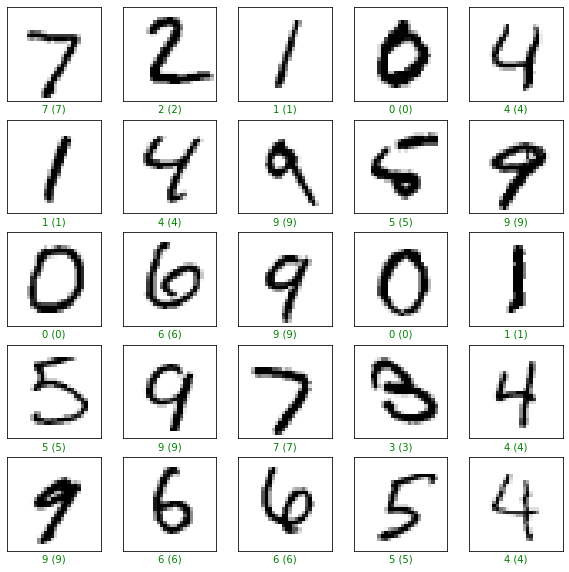

In [14]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

##(c) Download binary_alpha_digits dataset using tfds, split dataset **[1 point]**

In [72]:
## write your code here
dataset_name = "binary_alpha_digits"
train_ds, test_ds = tfds.load(dataset_name, split=['train[0%:80%]','train[80%:100%]'], batch_size=-1, as_supervised=True)

train_images, train_labels = tfds.as_numpy(train_ds)
test_images, test_labels   = tfds.as_numpy(test_ds)

print('Image size:', train_images[0].shape)
print('Training data size:',train_images.shape)
print('Training labels size:', train_labels.shape)
print('Testing data size:', test_images.shape)
# # reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# # because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
# train_images = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
# test_images  = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
# input_shape = (img_x, img_y, img_z)

# # Normalize input between 0 and 1
# # Very important
# train_images = train_images / 255.0
# test_images = test_images / 255.0


# ds_images, ds_labels = '<<Code for downloading binary_alpha_digits>>

Image size: (20, 16, 1)
Training data size: (1123, 20, 16, 1)
Training labels size: (1123,)
Testing data size: (281, 20, 16, 1)


In [ ]:
## Split dataset into 20% testing and 80% training

# test_size = 0.2   # fraction of test data

# '<<Write additional code as required>>

# train_images = '<<your code>>
# train_labels = '<<your code>>
# test_images = '<<your code>>
# test_labels = '<<your code>>

# # Check training, testing data size
# print(train_images.shape)
# print(test_images.shape)

### Visualize data

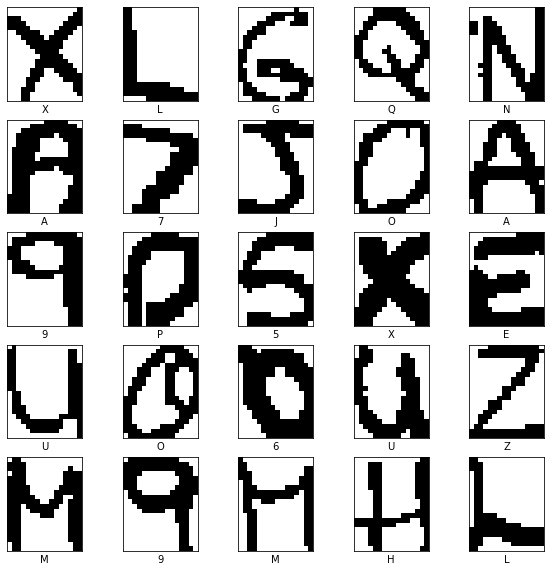

In [74]:
# Code to visualize predictions
# Incorrect predictions are highlighted in red
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(20, 16), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### (d) Upscale training, testing data to MNIST image size (28, 28, 1) **[2 points]**

In [75]:
newSize = 28

# create a numpy array for storing upscaled training images
train_upscale = np.zeros((train_images.shape[0], newSize, newSize, 1))
for i, t in enumerate(train_images):
  resized = cv2.resize(t, (newSize, newSize))
  train_upscale[i] = resized.reshape(newSize, newSize, 1)
print("Train upscale shape: ",train_upscale.shape)
print("Train images shape: ", train_images.shape)


# create a numpy array for storing upscaled testing images
test_upscale = np.zeros((test_images.shape[0], newSize, newSize, 1))
for i, t in enumerate(test_images):
  resized = cv2.resize(t, (newSize, newSize))
  test_upscale[i] = resized.reshape(newSize, newSize, 1)

print("Test upscale shape:  ", test_upscale.shape)
print("Test images shape: ", test_images.shape)

Train upscale shape:  (1123, 28, 28, 1)
Train images shape:  (1123, 20, 16, 1)
Test upscale shape:   (281, 28, 28, 1)
Test images shape:  (281, 20, 16, 1)


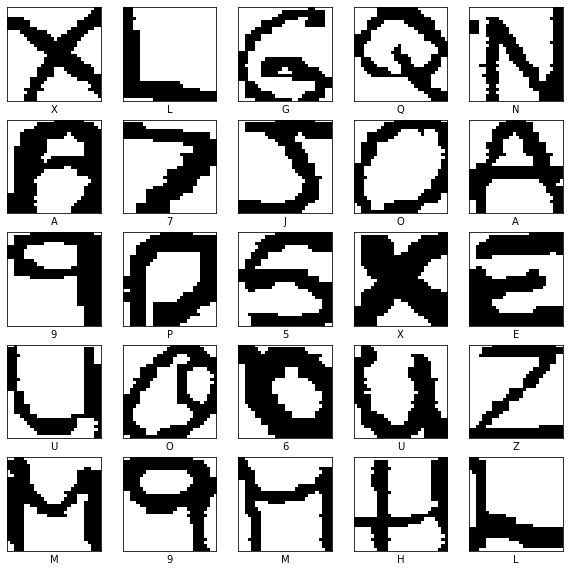

In [76]:
%matplotlib inline
# Visualize upscaled images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_upscale[i].reshape(28, 28), cmap=plt.cm.binary)
    # plt.imshow(train_images[i].reshape(20, 16), cmap=plt.cm.binary)
    # plt.imshow(train_upscale[1].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

##(e) Transfer learning-- Remove Last layer from your trained LeNet **[0.5 points]**



In [116]:
## You can decide whether to train the whole network again or fix layer weights from the MNIST-trained network
## Check link: https://keras.io/getting_started/faq/#how-can-i-freeze-keras-layers 
# print(f"Layers: {list(layer.name for layer in model.layers)}.")

## Code for removing last layer
# transfer_model = Model(inputs=model.inputs, outputs=model.layers[-4].output) #I remove everything after flatten
transfer_model = tf.keras.Sequential()
for layer in model.layers[:-3]:
  transfer_model.add(layer)

#Freeze layers
transfer_model.get_layer('conv2d').trainable = False

print(f"All layers: {list(layer.name for layer in transfer_model.layers)}.")
print(f"Frozen layers: {list(layer.name for layer in transfer_model.layers if (not transfer_model.get_layer(layer.name).trainable))}.")

All layers: ['conv2d', 'average_pooling2d', 'conv2d_1', 'average_pooling2d_1', 'conv2d_2'].
Frozen layers: [].


##(f) Transfer learning-- Add new layers to LeNet **[1.5 points]**


In [117]:
## Add one or more hidden layer
## Add output layer
# transfer_model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# transfer_model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
# transfer_model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(84, activation='tanh'))
transfer_model.add(layers.Dense(64, activation='tanh'))
transfer_model.add(layers.Dense(36, activation='softmax'))
transfer_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)             

In [118]:
# Compile the model with appropriate Loss function
transfer_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##(g) Train the model and show accuracy on the testing dataset (test_upscale) **[1.5 point]**

In [119]:
## Your code here #Probably over-fitting :
epochs = 40
batch_size = 512
transfer_model.fit(train_upscale, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/40
3/3 [==============================] - 1s 31ms/step - loss: 3.8197 - accuracy: 0.0169
Epoch 2/40
3/3 [==============================] - 0s 31ms/step - loss: 3.4113 - accuracy: 0.0882
Epoch 3/40
3/3 [==============================] - 0s 33ms/step - loss: 3.0868 - accuracy: 0.2244
Epoch 4/40
3/3 [==============================] - 0s 35ms/step - loss: 2.8257 - accuracy: 0.3375
Epoch 5/40
3/3 [==============================] - 0s 35ms/step - loss: 2.6055 - accuracy: 0.4488
Epoch 6/40
3/3 [==============================] - 0s 34ms/step - loss: 2.4207 - accuracy: 0.5227
Epoch 7/40
3/3 [==============================] - 0s 41ms/step - loss: 2.2539 - accuracy: 0.5752
Epoch 8/40
3/3 [==============================] - 0s 37ms/step - loss: 2.1067 - accuracy: 0.6109
Epoch 9/40
3/3 [==============================] - 0s 41ms/step - loss: 1.9715 - accuracy: 0.6536
Epoch 10/40
3/3 [==============================] - 0s 37ms/step - loss: 1.8458 - accuracy: 0.6821
Epoch 11/40
3/3 [============

In [120]:
test_loss, test_acc = transfer_model.evaluate(test_upscale, test_labels)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 3ms/step - loss: 0.9027 - accuracy: 0.7224
Test accuracy: 0.7224199175834656


9/9 [==============================] - 0s 2ms/step


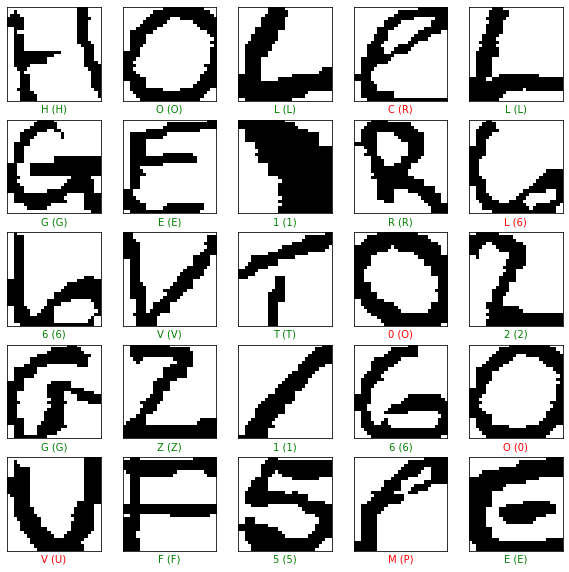

In [121]:
predictions = transfer_model.predict(test_upscale)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_upscale[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)